# Exploratory Data Analysis

This notebook assumes that data have been collected by running `notebooks/01-scrape_data.ipynb`.

Read data file.

In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/reddit_posts.csv")

Sample 10 random rows to get some idea of how to clean the data.

In [6]:
df.sample(10)

,id,created_utc,title,selftext,subreddit_name
426,r6llo5,1.638384e+09,[D] How do (scalable) Gaussian processes compa...,Most discussions I've seen on this topic don't...,MachineLearning
504,r1kzu7,1.637805e+09,[D] How to Build a Knowledge Graph with Neo4J ...,Knowledge graphs are essential for informatio...,MachineLearning
1371,r8v6rk,1.638641e+09,Career change into Programming-Data at 30 y/o ...,"\n\nHi everyone,\n\nbefore starting, just a l...",LearnMachineLearning
314,rc32jz,1.639004e+09,[D] Looking for Website Like ArXiv But In Fore...,I would like to do some document classificatio...,MachineLearning
723,qpuqtk,1.636429e+09,[R] The How and Why of Bayesian Nonparametric ...,"A nice summary paper, at the cutting edge of B...",MachineLearning
881,rw5sqt,1.641333e+09,Question about Kernel in SVM,"I was just wondering, what would you say is th...",LearnMachineLearning
1327,raq8ti,1.638850e+09,Can anyone help me with this multi-part question?,**(Question 1)** Suppose that you are working...,LearnMachineLearning
1207,rf8vfu,1.639376e+09,Useful data summary statistics with image clas...,Hello!\n\nI am doing image classification wit...,LearnMachineLearning
1477,r4mlvk,1.638158e+09,How do I get this basic LSTM example working?,I've created a 'basic scenario' so I can see t...,LearnMachineLearning
215,rhwofs,1.639679e+09,[D] Is it right to use your PhD student as an ...,"Hi guys, I'm sure you've seen the recent discu...",MachineLearning


`r/MachineLearning` require the authors to put a tag in the title (e.g. `[D]`, `[Q]`), while `r/learnmachinelearning` doesn't. So to guess whether a post belongs to `r/MachineLearning`, the model just needs to see if its title has a tag. However, such model wouldn't be useful.

See if there are any missing data.

In [7]:
df.isna().sum()

id                 0
created_utc        0
title              0
selftext          22
subreddit_name     0
dtype: int64

Define a function to plot word clouds.

In [27]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(16, 12))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [25]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_class = WordCloud(
    width=800,
    height=600, 
    random_state=1,
    collocations=False, 
    stopwords = STOPWORDS,
)

Split the dataframe based on subreddit. For each subreddit, concatenate the titles into a long string.

In [8]:
text_per_subreddit = df.groupby(["subreddit_name"])["title"].apply("".join)

Word cloud for titles in r/MachineLearning.

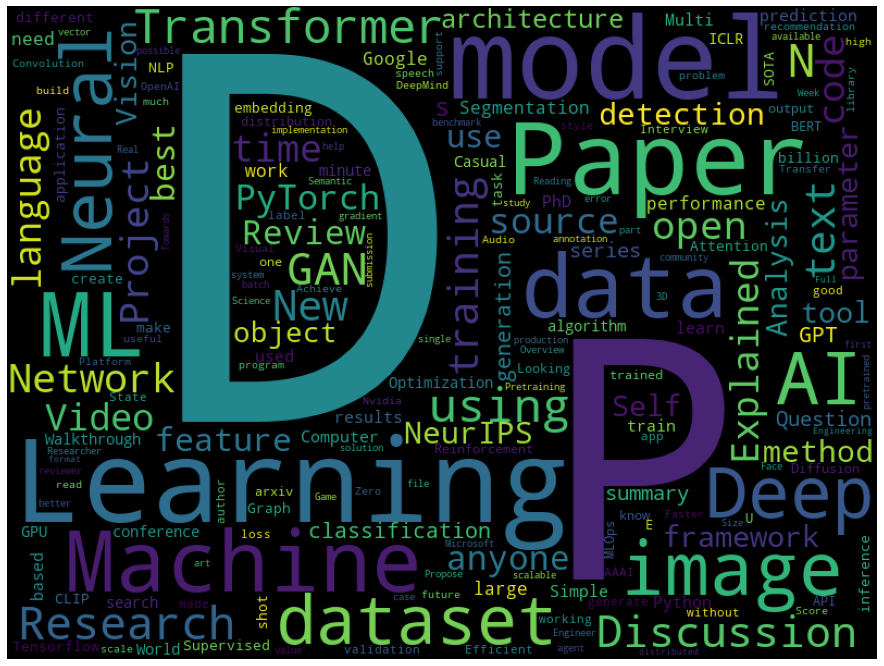

In [28]:
ml_wordcloud = wordcloud_class.generate(text_per_subreddit["MachineLearning"])
plot_cloud(ml_wordcloud)

Word cloud for titles in r/LearnMachineLearning.

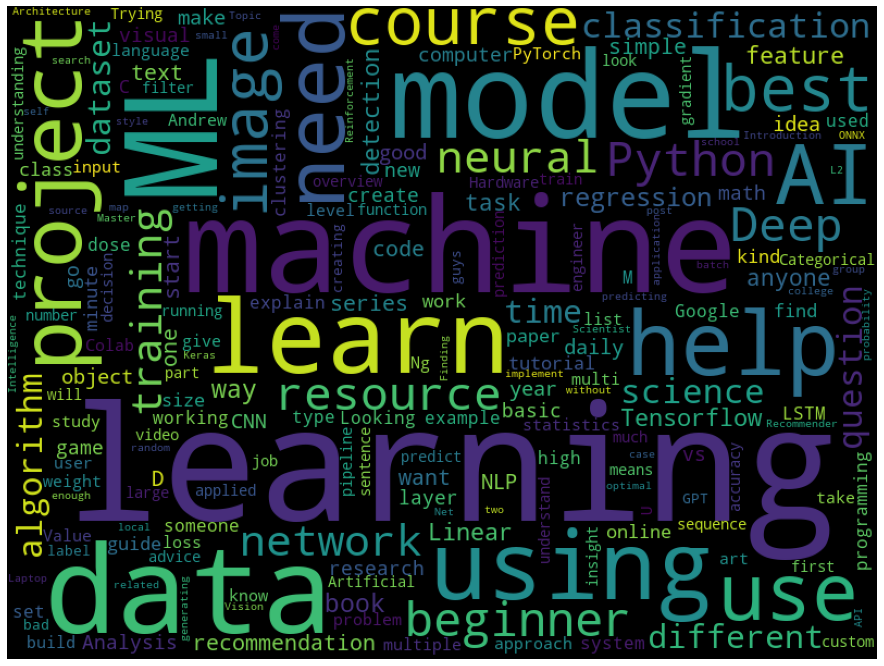

In [29]:
learnml_wordcloud = wordcloud_class.generate(text_per_subreddit["LearnMachineLearning"])
plot_cloud(learnml_wordcloud)